# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [2]:
orig_data = pd.read_csv('iris-dataset.csv')
orig_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
orig_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

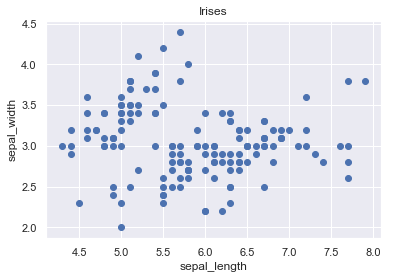

In [4]:
plt.scatter(orig_data['sepal_length'],orig_data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Irises')
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [5]:
data_by_sepal = orig_data[['sepal_length','sepal_width']]
data_by_sepal.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
kmeans = KMeans(2)
data_by_sepal_res = data_by_sepal.copy()
data_by_sepal_res['cluster'] = kmeans.fit_predict(data_by_sepal)
data_by_sepal_res.head()

,sepal_length,sepal_width,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [7]:
data_by_sepal_res.describe()

,sepal_length,sepal_width,cluster
count,150.000000,150.000000,150.000000
mean,5.843333,3.054000,0.446667
std,0.828066,0.433594,0.498813
min,4.300000,2.000000,0.000000
25%,5.100000,2.800000,0.000000
50%,5.800000,3.000000,0.000000
75%,6.400000,3.300000,1.000000
max,7.900000,4.400000,1.000000


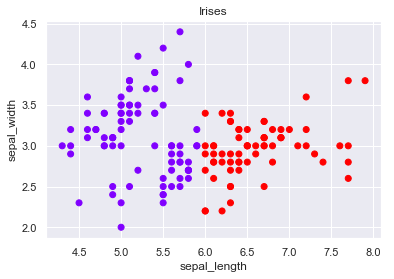

In [8]:
plt.scatter(data_by_sepal_res['sepal_length'],data_by_sepal_res['sepal_width'],c=data_by_sepal_res['cluster'],cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Irises')
plt.show()

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [9]:
data_sepal_stand = pd.DataFrame(preprocessing.scale(data_by_sepal))
data_sepal_stand.head()

,0,1
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460


In [10]:
data_sepal_stand.describe()

,0,1
count,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16
std,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00
25%,-9.006812e-01,-5.877635e-01
50%,-5.250608e-02,-1.249576e-01
75%,6.745011e-01,5.692513e-01
max,2.492019e+00,3.114684e+00


# Clustering (scaled data)

In [11]:
kmeans = KMeans(2)
data_by_sepal_res['cluster'] = kmeans.fit_predict(data_sepal_stand)
data_by_sepal_res.head()

,sepal_length,sepal_width,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [12]:
data_by_sepal_res.describe()

,sepal_length,sepal_width,cluster
count,150.000000,150.000000,150.000000
mean,5.843333,3.054000,0.666667
std,0.828066,0.433594,0.472984
min,4.300000,2.000000,0.000000
25%,5.100000,2.800000,0.000000
50%,5.800000,3.000000,1.000000
75%,6.400000,3.300000,1.000000
max,7.900000,4.400000,1.000000


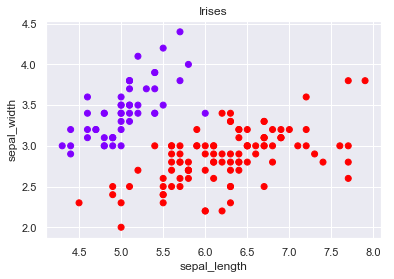

In [13]:
plt.scatter(data_by_sepal_res['sepal_length'],data_by_sepal_res['sepal_width'],c=data_by_sepal_res['cluster'],cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Irises')
plt.show()

## Take Advantage of the Elbow Method

### WCSS

In [14]:
wcss = []
for i in range(1,10):
    wcss.append(KMeans(i).fit(data_sepal_stand).inertia_)
wcss

[300.0,
 168.39262198361087,
 103.80692090161443,
 79.76763093668842,
 61.763287316926274,
 52.15399746626544,
 46.22388568424493,
 36.25190752720021,
 31.276664780141246]

### The Elbow Method

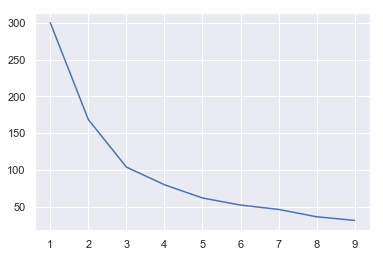

In [15]:
plt.plot(range(1,10),wcss)
plt.show()

How many clusters are there?

## Clusters - 3

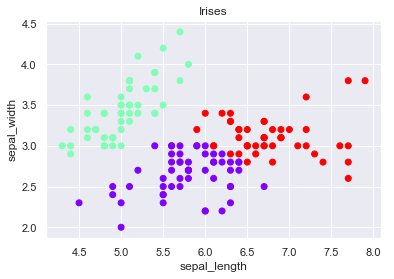

In [16]:
kmeans = KMeans(3)
data_by_sepal_res['cluster'] = kmeans.fit_predict(data_sepal_stand)
plt.scatter(data_by_sepal_res['sepal_length'],data_by_sepal_res['sepal_width'],c=data_by_sepal_res['cluster'],cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Irises')
plt.show()

## Clusters - 5

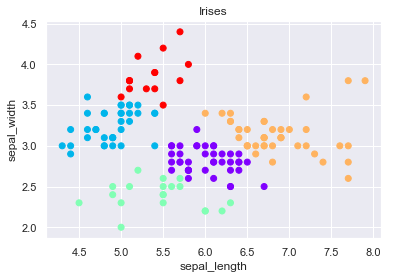

In [17]:
kmeans = KMeans(5)
data_by_sepal_res['cluster'] = kmeans.fit_predict(data_sepal_stand)
plt.scatter(data_by_sepal_res['sepal_length'],data_by_sepal_res['sepal_width'],c=data_by_sepal_res['cluster'],cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Irises')
plt.show()